In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from eval import *
import pandas as pd
import numpy as np

In [3]:
def get_data(path_real, path_fake, real_sep=';', fake_sep=',', drop_columns=None):
    real = pd.read_csv(path_real, sep=real_sep, low_memory=False)
    fake = pd.read_csv(path_fake, sep=fake_sep, low_memory=False)
    shared_min = min(len(fake), len(real))
    real = real.sample(shared_min)
    fake = fake.sample(shared_min)
    if set(fake.columns.tolist()).issubset(set(real.columns.tolist())):
        real = real[fake.columns]
    elif drop_columns is not None:
        real = real.drop(drop_columns, axis=1)
        try:
            fake = fake.drop(drop_columns, axis=1)
        except:
            print(f'Some of {drop_columns} were not found on real.index.')
        assert len(fake.columns.tolist()) == len(real.columns.tolist()), f'Real and fake do not have same nr of columns: {len(fake.columns)} and {len(real.columns)}'
        fake.columns = real.columns
    else:
        fake.columns = real.columns
        
    for col in fake.columns:
        fake[col] = fake[col].astype(real[col].dtype)
    return real, fake

# Census

## Original TGAN

In [6]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/census_sample_tgan.csv', real_sep=',')
tgan_evaluator = DataEvaluator(real, fake)

In [6]:
tgan_evaluator.evaluate(target_col='income', verbose=False)


Correlation metric: kendalltau


C:\Users\C64062\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\C64062\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Results:
Number of duplicate rows is ignored for total score.
                                                   Result
basic statistics                                   0.9003
Correlation column correlations                    0.7416
Mean Correlation between fake and real columns     0.7275
Mean correlation classifier F1                     0.4222
Correlation 5 PCA components                       1.0000
Duplicate data between sets                    9,197.0000
Total Result                                       0.7583


object


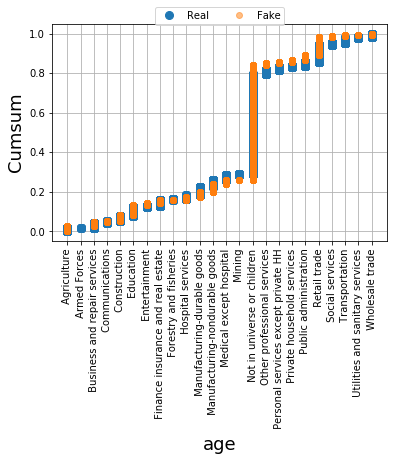

In [15]:
col = 'major industry code'
print(real[col].dtype)
cdf(real[col], fake[col], 'age', 'Cumsum')

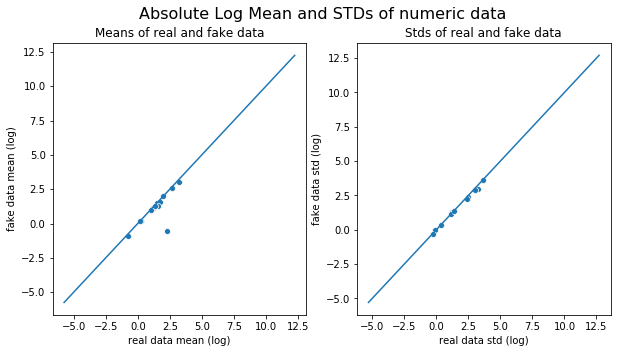

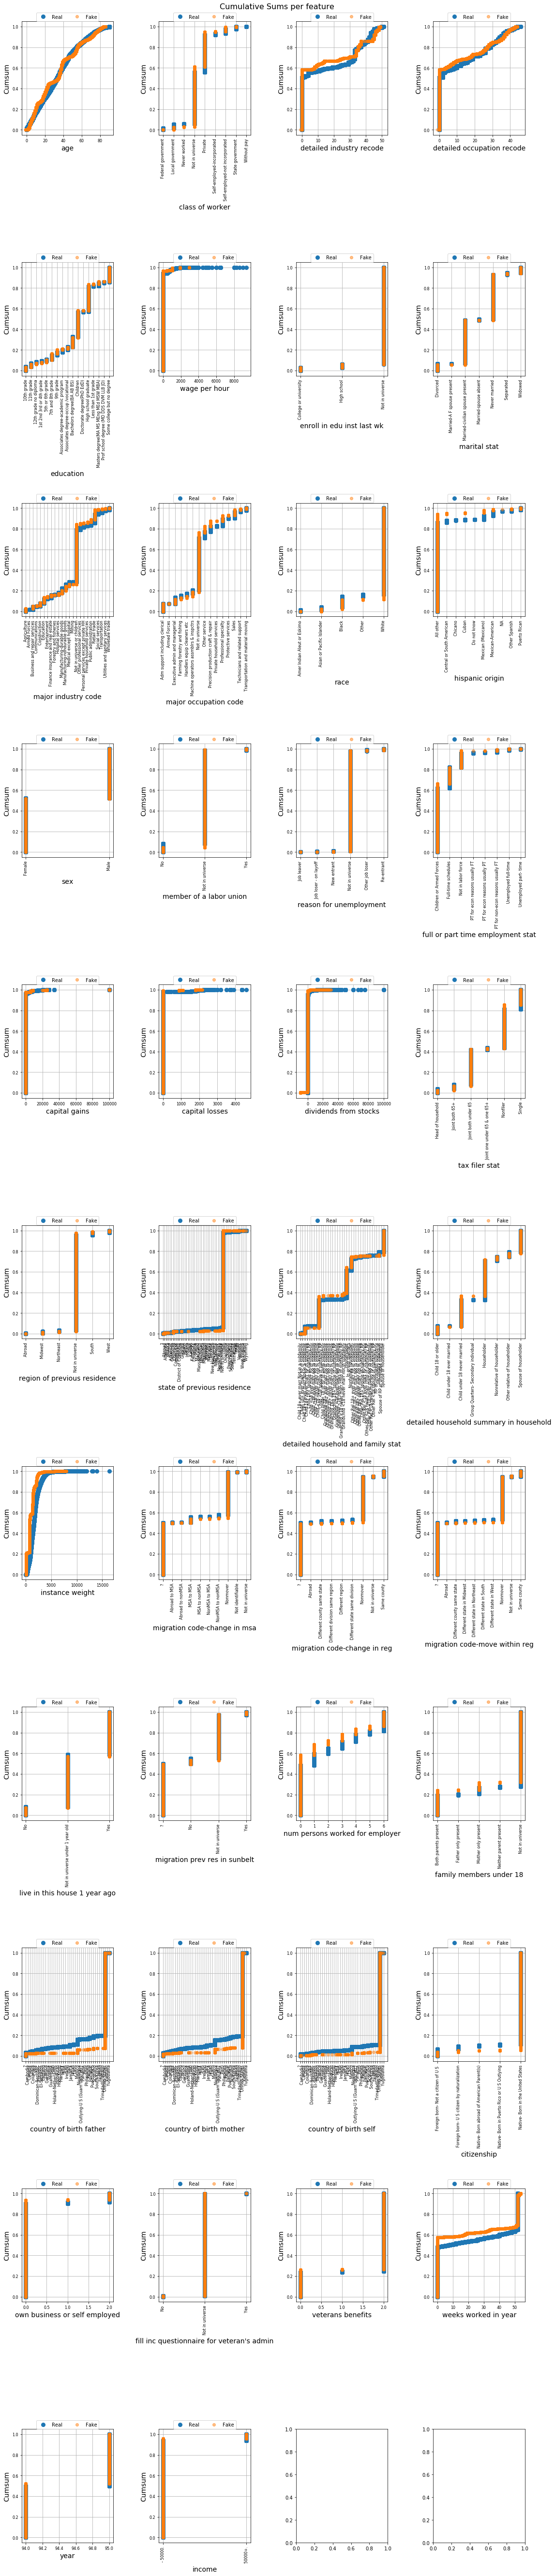

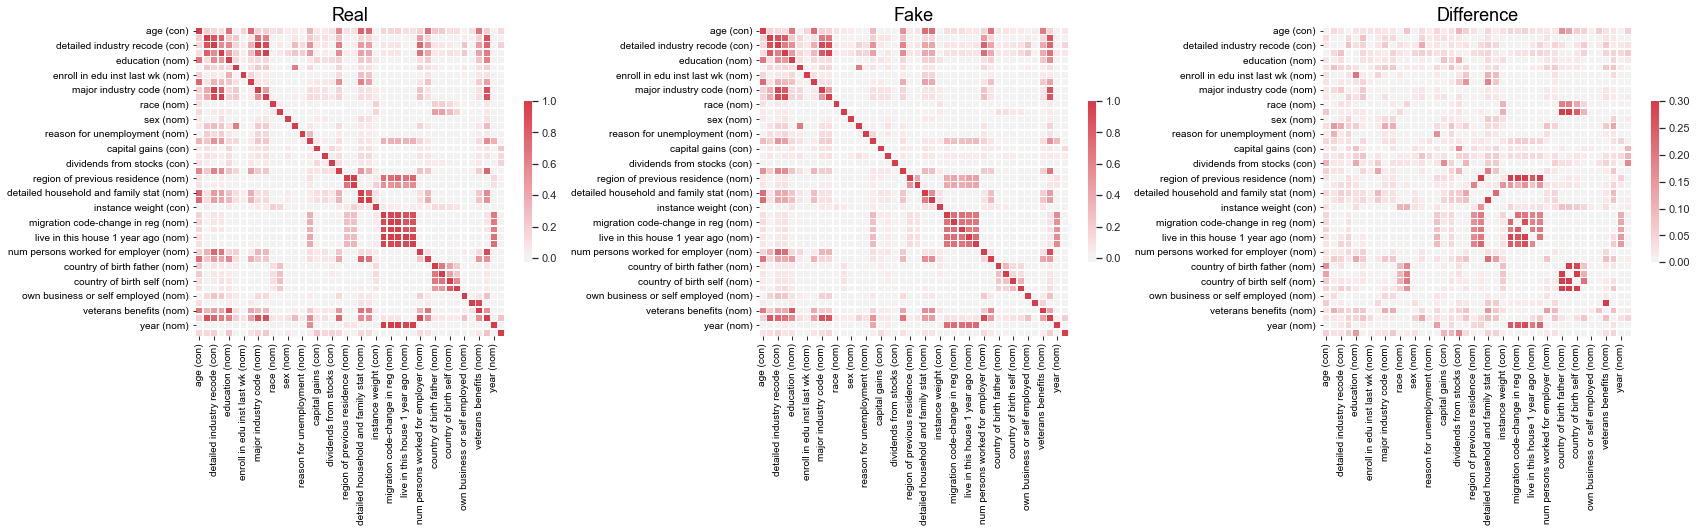

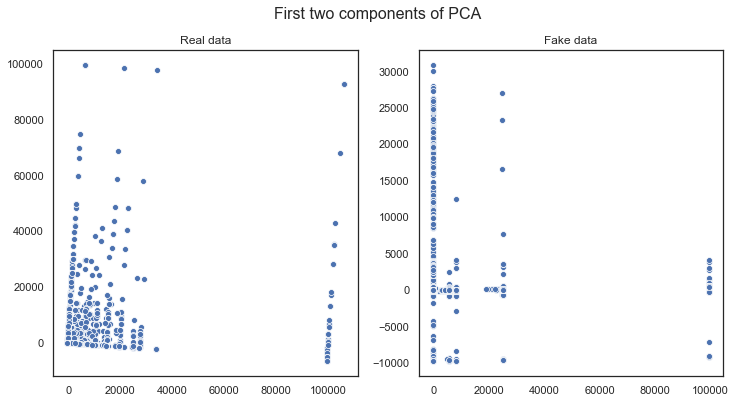

In [38]:
tgan_org_evaluator.visual_evaluation(annot=False)

## WGAN-GP Fixed

In [8]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/census_sample_tgan-wgan-gp.csv', real_sep=',')
wgan_evaluator = DataEvaluator(real, fake)

In [ ]:
wgan_evaluator.evaluate(target_col='income', verbose=False)


Correlation metric: kendalltau


C:\Users\C64062\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\C64062\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
wgan_evaluator.visual_evaluation(annot=False)

## TGAN Skip Connections

In [ ]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/census_sample_tgan-skip-connections-columns-corrected.csv', real_sep=',', fake_sep=';')
skip_evaluator = DataEvaluator(real, fake)

In [ ]:
skip_evaluator.evaluate(target_col='income', verbose=False)

In [ ]:
skip_evaluator.visual_evaluation(annot=False)

## MedGAN

In [ ]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/sample_census_medgan_100.csv', real_sep=',')
medgan_evaluator = DataEvaluator(real, fake)

In [ ]:
medgan_evaluator.evaluate(target_col='income', verbose=False)

In [ ]:
medgan_evaluator.visual_evaluation(annot=False)

## TableGAN

In [ ]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/sample_census_tablegan_100.csv', real_sep=',')
tablegan_evaluator = DataEvaluator(real, fake)

In [ ]:
tablegan_evaluator.evaluate(target_col='income', verbose=False)

In [ ]:
tablegan_evaluator.visual_evaluation(annot=False)

## Feature Importance

In [24]:
target_col = 'trans_type'
x = numerical_encoding(fake.drop([target_col], axis=1), nominal_columns=tgan_org_evaluator.categorical_columns)

[3.15558081e-03 2.25478515e-03 1.00895154e-02 1.60792182e-03 3.68700434e-03 0.00000000e+00 4.03186594e-05 0.00000000e+00 0.00000000e+00 3.42898353e-05 2.31575622e-04 0.00000000e+00 6.94454588e-04 2.26483782e-02
 1.71159461e-03 2.68261433e-03 5.46665979e-01 2.46056113e-03 4.02035426e-01]
Index(['trans_id', 'account_id', 'trans_amount', 'balance_after_trans',
       'trans_operation_CC_WITHDRAWAL',
       'trans_operation_COLLECTION_FROM_OTHER_BANK',
       'trans_operation_CREDIT_IN_CASH',
       'trans_operation_REMITTANCE_TO_OTHER_BANK', 'trans_operation_UNKNOWN',
       'trans_operation_WITHDRAWAL_IN_CASH', 'trans_k_symbol_HOUSEHOLD',
       'trans_k_symbol_INSURANCE_PAYMENT', 'trans_k_symbol_INTEREST_CREDITED',
       'trans_k_symbol_LOAN_PAYMENT', 'trans_k_symbol_OLD_AGE_PENSION',
       'trans_k_symbol_PAYMENT_FOR_STATEMENT',
       'trans_k_symbol_SANCTION_INTEREST', 'trans_k_symbol_UNKNOWN',
       'trans_date'],
      dtype='object')
[ 5  7  8 11  9  6 10 12  3 14  1 17 15  0  

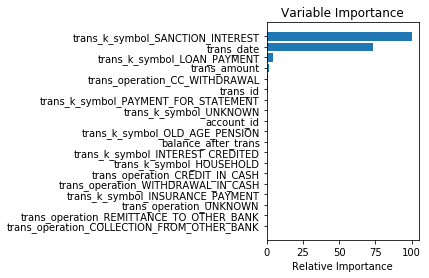

In [26]:
feature_importance = tgan_org_evaluator.f_classifiers[2].feature_importances_
print(feature_importance)
# feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
print(column_names)
print(sorted_idx)
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

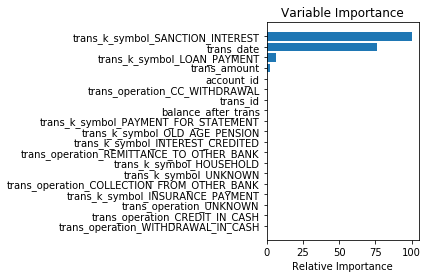

In [27]:
feature_importance = tgan_org_evaluator.r_classifiers[2].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()